# Time series forecasting- Sparkling data

In [2]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Importing Libraries
import numpy as np # Numerical libraries
import pandas as pd # to handle data in form of rows and columns

# For Visualisation-import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
# The following code is to set the subsequent figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

# To calculate accuracy measures
from sklearn import metrics
#highlights
import matplotlib.dates as mdates

1.	Read the data as an appropriate Time Series data and plot the data.

Loading data

In [3]:
#read the sparkling data
df_sparkling = pd.read_csv('/content/drive/MyDrive/data/Project 2/Sparkling.csv')
df_sparkling.head(10)

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471
5   1980-06       1377
6   1980-07       1966
7   1980-08       2453
8   1980-09       1984
9   1980-10       2596

In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame
df_sparkling['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_sparkling.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [6]:
# Set Time_Stamp as an index
df_sparkling.set_index('Time_Stamp',inplace=True)
df_sparkling.drop(['YearMonth'], axis=1, inplace=True)
df_sparkling.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Checking null values

In [7]:
#if any null value in present
df_sparkling.isnull().any()

Sparkling    False
dtype: bool

**Sales Data of Sparkling Wines:**

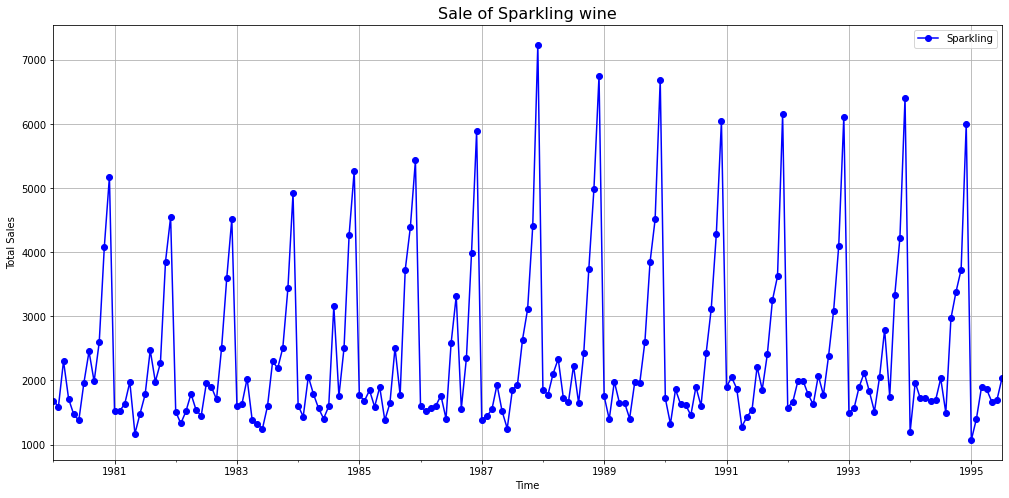

In [8]:
printmd('**Sales Data of Sparkling Wines:**')
df_sparkling.plot(marker = "o",figsize=(17, 8),color='blue')
plt.title('Sale of Sparkling wine', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.grid();
plt.show()

2.	Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

# Exploratory Data Analysis

In [9]:
printmd('**Data Description for Sparkling Dataset:**')
df_sparkling.describe()

**Data Description for Sparkling Dataset:**

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [10]:
## Squeese = True will return the index col as series
spark = pd.read_csv('/content/drive/MyDrive/data/Project 2/Sparkling.csv',parse_dates=True,squeeze=True,index_col=0)
printmd('**View the top 5 rows of Sparkling dataset :**')
spark.head()

**View the top 5 rows of Sparkling dataset :**

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

**Yearly Boxplot for Sparkling Dataset:**

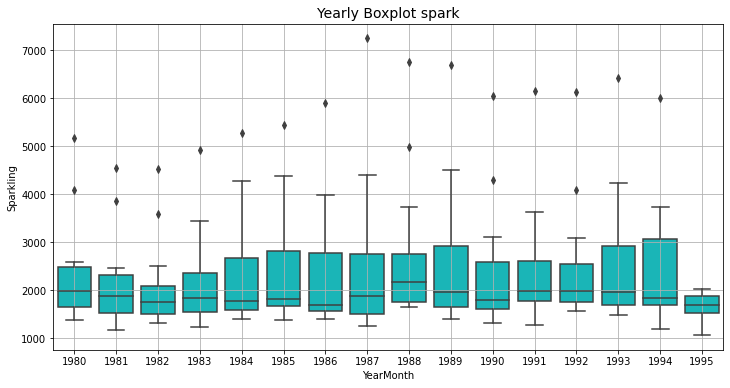

In [11]:
#yearly boxplot
printmd('**Yearly Boxplot for Sparkling Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = spark.index.year,y = spark, color = 'darkturquoise')
plt.title('Yearly Boxplot spark', fontsize=14)
plt.grid()
plt.show()

**Monthly Boxplot for all the years for sparkling Dataset:**

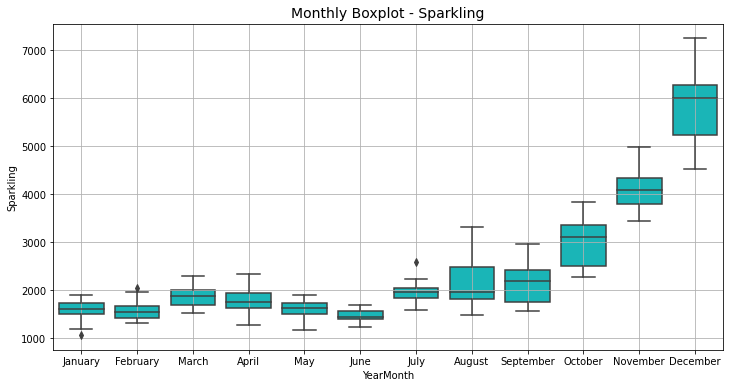

In [12]:
#monthly boxplot
printmd('**Monthly Boxplot for all the years for sparkling Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = spark.index.month_name(),y = spark, color='darkturquoise')
plt.title('Monthly Boxplot - Sparkling', fontsize=14)
plt.grid()
plt.show()

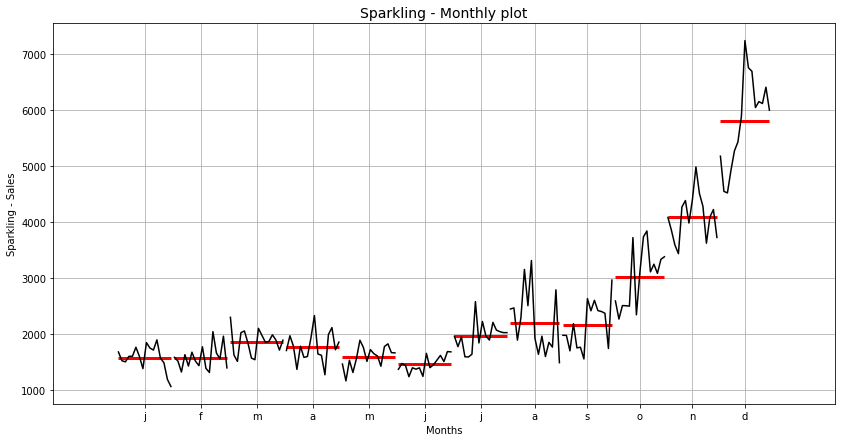

In [13]:
#monthly plot
from statsmodels.graphics.tsaplots import month_plot
month_plot(df_sparkling,ylabel='Sparkling - Sales')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)
plt.grid()
plt.show()

In [14]:
monthly_sales_across_years_spark = pd.pivot_table(pd.DataFrame(df_sparkling), columns =df_sparkling.index.month, 
                                                      index = df_sparkling.index.year)
monthly_sales_across_years_spark

Sparkling                          ...                                
Time_Stamp        1       2       3       4   ...      9       10      11      12
Time_Stamp                                    ...                                
1980          1686.0  1591.0  2304.0  1712.0  ...  1984.0  2596.0  4087.0  5179.0
1981          1530.0  1523.0  1633.0  1976.0  ...  1981.0  2273.0  3857.0  4551.0
1982          1510.0  1329.0  1518.0  1790.0  ...  1706.0  2514.0  3593.0  4524.0
1983          1609.0  1638.0  2030.0  1375.0  ...  2191.0  2511.0  3440.0  4923.0
1984          1609.0  1435.0  2061.0  1789.0  ...  1759.0  2504.0  4273.0  5274.0
1985          1771.0  1682.0  1846.0  1589.0  ...  1771.0  3727.0  4388.0  5434.0
1986          1606.0  1523.0  1577.0  1605.0  ...  1562.0  2349.0  3987.0  5891.0
1987          1389.0  1442.0  1548.0  1935.0  ...  2638.0  3114.0  4405.0  7242.0
1988          1853.0  1779.0  2108.0  2336.0  ...  2421.0  3740.0  4988.0  6757.0
1989          1757.0  1394.0  1982.0  1650.0  ...  2608.0  3845.0  4514.0  6694.0
1990          1720.0  1321.0  1859.0  1628.0  ...  2424.0  3116.0  4286.0  6047.0
1991          1902.0  2049.0  1874.0  1279.0  ...  2408.0  3252.0  3627.0  6153.0
1992          1577.0  1667.0  1993.0  1997.0  ...  2377.0  3088.0  4096.0  6119.0
1993          1494.0  1564.0  1898.0  2121.0  ...  1749.0  3339.0  4227.0  6410.0
1994          1197.0  1968.0  1720.0  1725.0  ...  2968.0  3385.0  3729.0  5999.0
1995          1070.0  1402.0  1897.0  1862.0  ...     NaN     NaN     NaN     NaN

[16 rows x 12 columns]

**Monthly Wine sales across years for sparkling:**

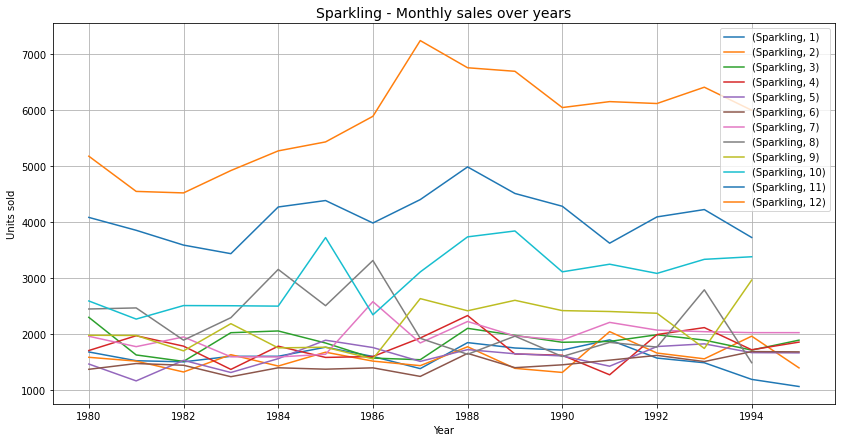

In [15]:
printmd('**Monthly Wine sales across years for sparkling:**')
monthly_sales_across_years_spark.plot()
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years', fontsize=14)
plt.grid()
plt.show()

# Decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose



*   Multiplicative decomposition




**Decomposition of Rose Time Series with multiplicative Seasonality:**

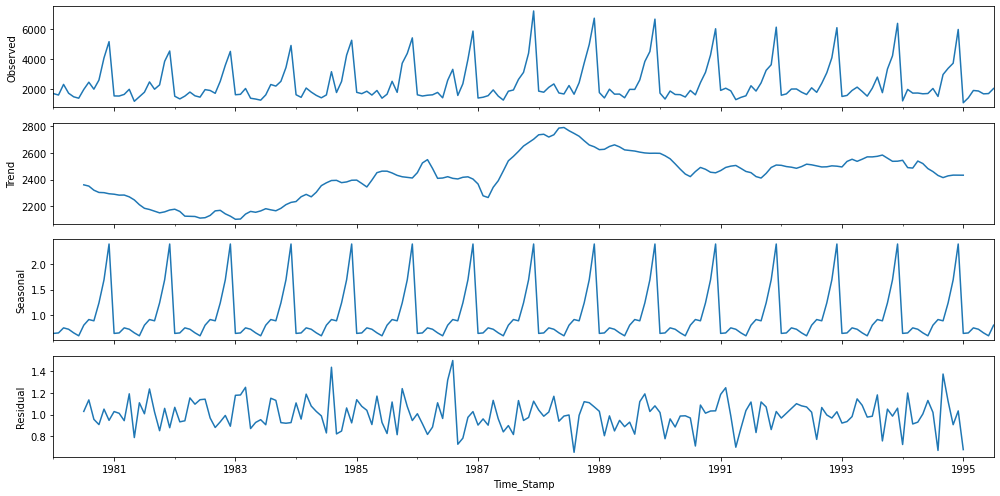

In [17]:
printmd('**Decomposition of Rose Time Series with multiplicative Seasonality:**')
decomposition_mul = seasonal_decompose(df_sparkling,model='multiplicative')
decomposition_mul.plot();



*   Additive decomposition



**Decomposition of Rose Time Series with additive Seasonality:**

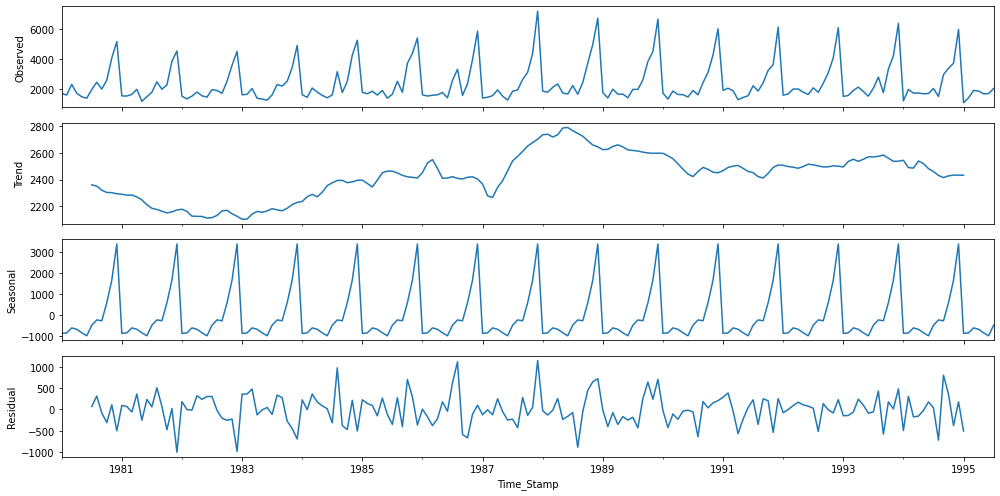

In [18]:
printmd('**Decomposition of Rose Time Series with additive Seasonality:**')
decomposition_mul = seasonal_decompose(df_sparkling,model='additive')
decomposition_mul.plot();

# Checking the stationarity of data

5.	Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

In [19]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.grid()
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

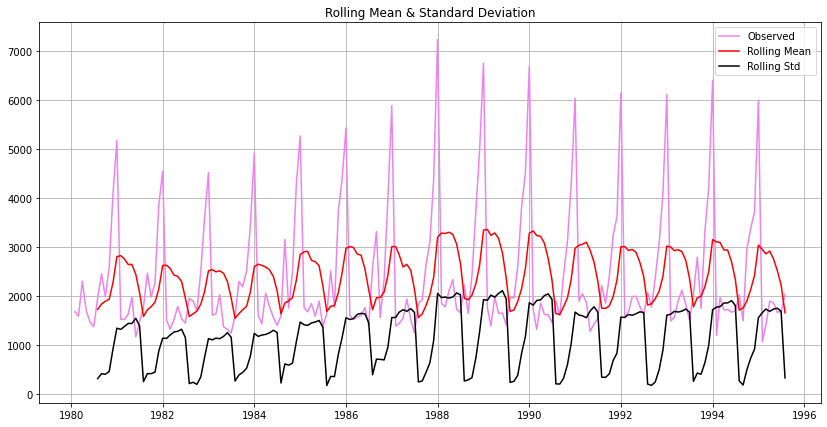

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [20]:
test_stationarity(df_sparkling['Sparkling'], 'violet')

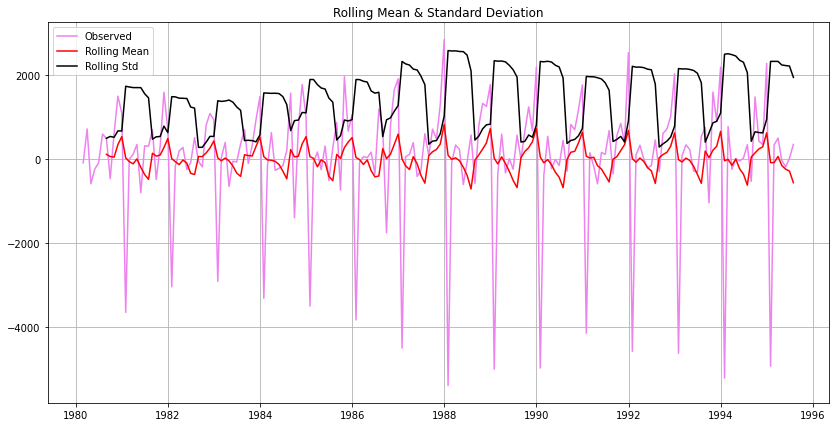

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [21]:
test_stationarity(df_sparkling['Sparkling'].diff().dropna(), 'violet')

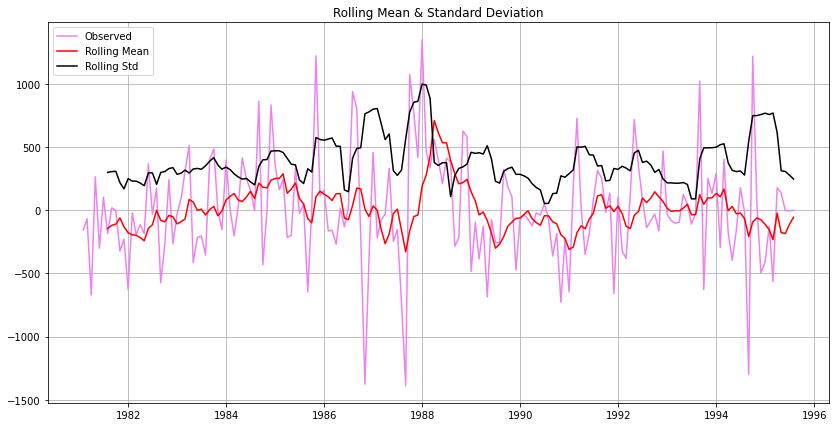

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [22]:
#check Seasonality Time Series: 
test_stationarity(df_sparkling['Sparkling'].diff(12).dropna(), 'violet')

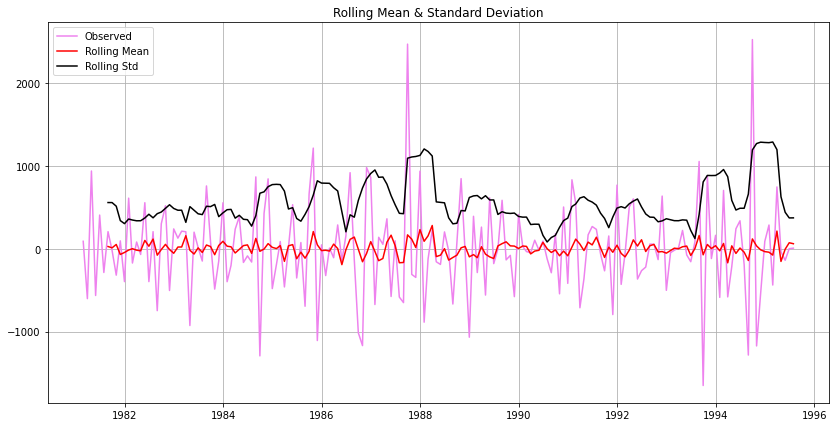

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [23]:
test_stationarity((df_sparkling['Sparkling'].diff(12).dropna()).diff().dropna(), 'violet')

# Correlation

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

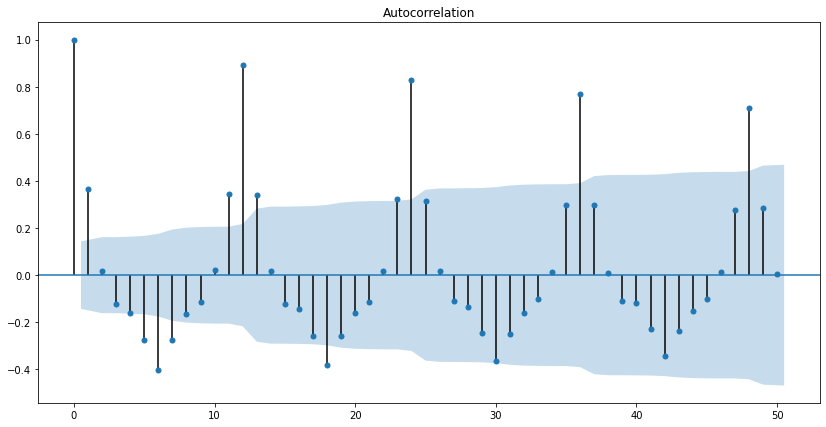

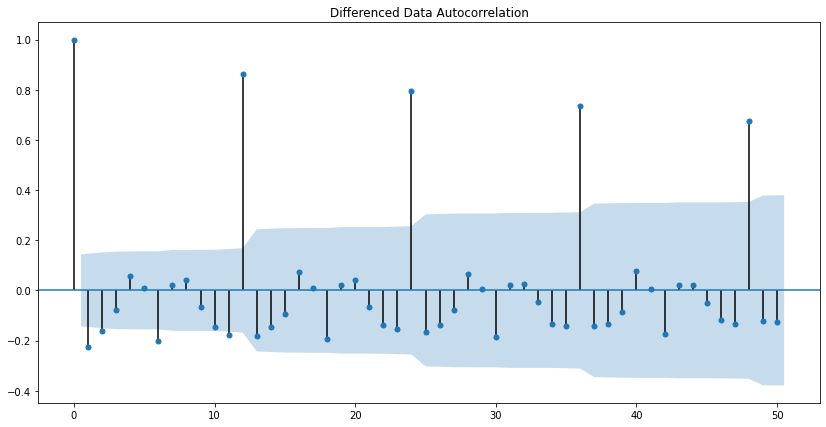

In [25]:
#ACF plots
plot_acf(df_sparkling['Sparkling'],lags=50)
plot_acf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();


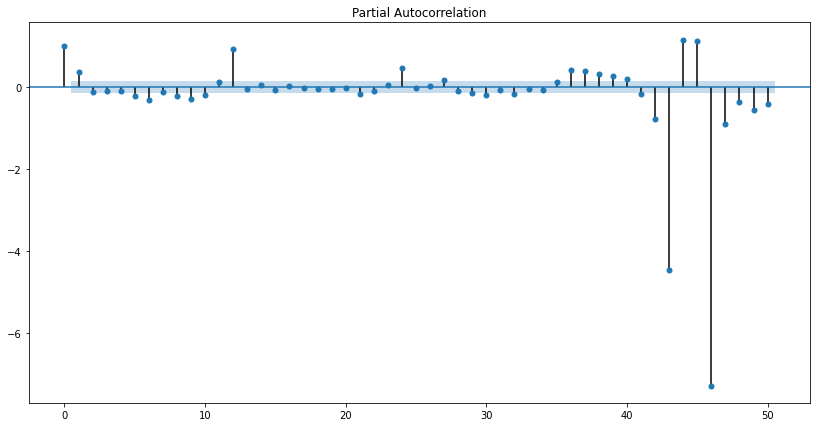

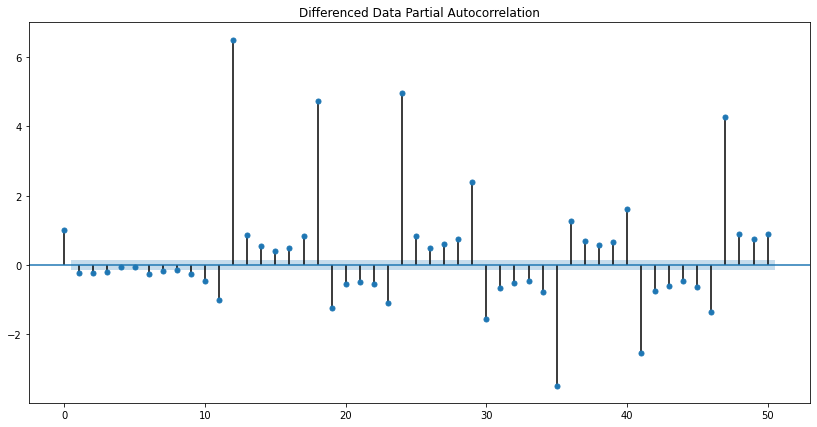

In [26]:
#PACF
plot_pacf(df_sparkling['Sparkling'],lags=50)
plot_pacf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

# Split the datasets into training and testing

3.	Split the data into training and test. The test data should start in 1991.

In [27]:
df_sparkling = pd.DataFrame(df_sparkling )
train_sparkling = df_sparkling [df_sparkling.index.year < 1991]
test_sparkling = df_sparkling [df_sparkling.index.year >= 1991]
print('Length of Train Data:', len(train_sparkling))
print('Length of Test Data:', len(test_sparkling))
#train_sparkling
#test_sparkling

Length of Train Data: 132
Length of Test Data: 55


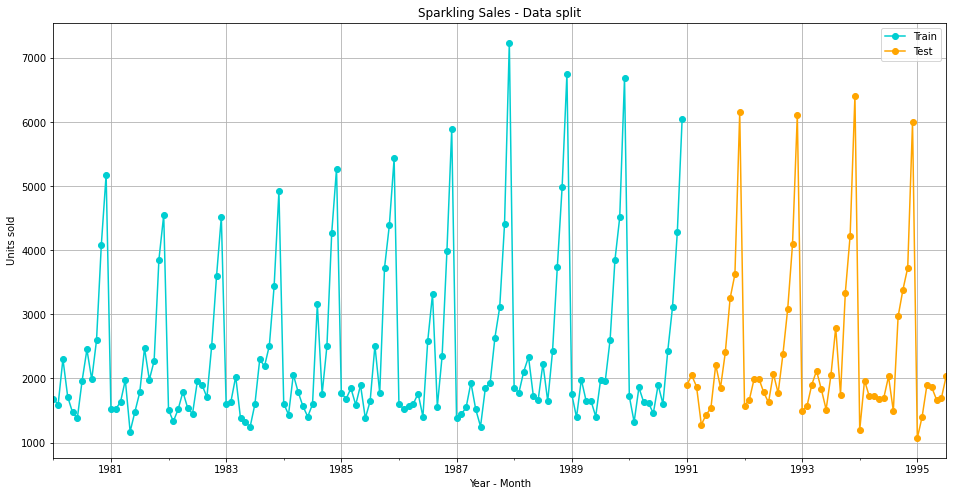

In [28]:
plt.figure(figsize = (16,8))
train_sparkling['Sparkling'].plot(label = 'Train',color='darkturquoise',marker="o")
test_sparkling['Sparkling'].plot(label = 'Test',color='orange',marker="o")
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.grid()
plt.show;

# Building Various Exponential smoothing models

4.	Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.


# Simple Exponential smoothing

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [30]:
SES_train = train_sparkling.copy()
SES_test = test_sparkling.copy()

model_SES = SimpleExpSmoothing(SES_train['Sparkling'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_sparkling))
SES_test.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Sparkling     predict
Time_Stamp                       
1991-01-31       1902  2403.78287
1991-02-28       2049  2403.78287
1991-03-31       1874  2403.78287
1991-04-30       1279  2403.78287
1991-05-31       1432  2403.78287

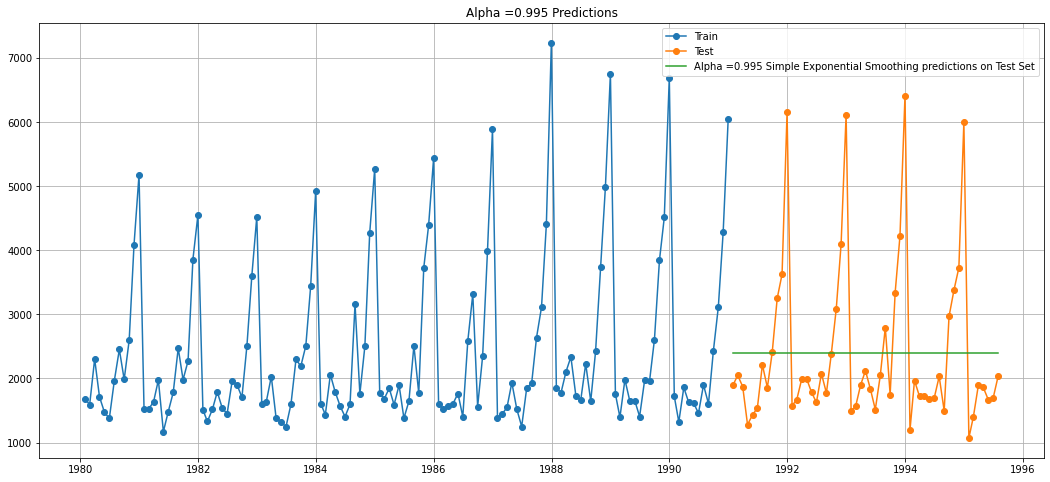

In [31]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,8))
plt.plot(SES_train['Sparkling'], label='Train',marker="o")
plt.plot(SES_test['Sparkling'], label='Test',marker="o")

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [32]:
#model evalution
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
Sparkling_resultsa = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,Simple Exponential Smoothing'])
Sparkling_resultsa

Test RMSE
Alpha=0.995,Simple Exponential Smoothing  1275.081813

In [33]:
#checking test accuracy for diffrent alpha values
# First we will define an empty dataframe to store our values from the loop
resultse = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})

In [34]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultse = resultse.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [35]:
resultse.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285
7           1.0  1373.082528  3864.279352

In [36]:
resultses= pd.DataFrame({'Test RMSE': [resultse.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])
resultses

Test RMSE
Alpha=0.3,SimpleExponentialSmoothing  1935.507132

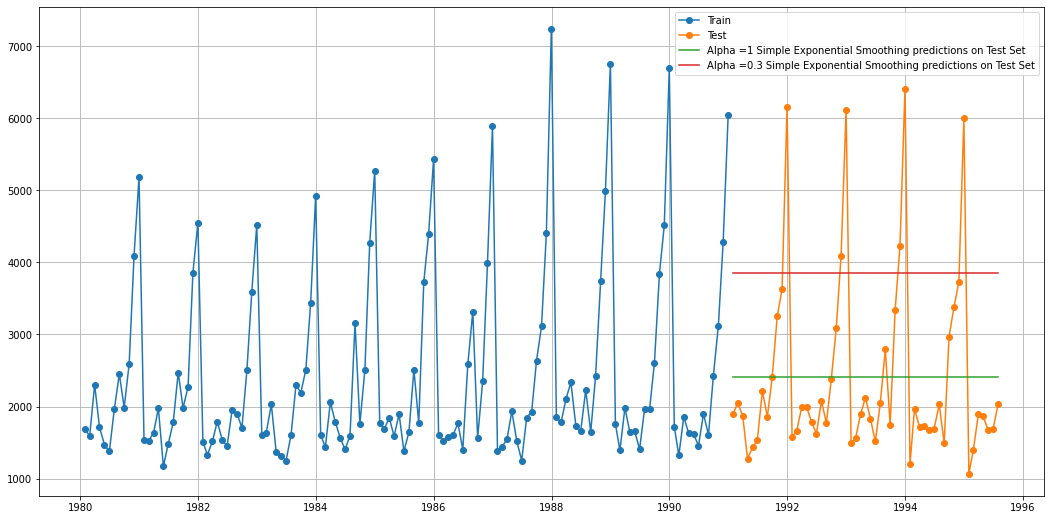

In [37]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train',marker="o")
plt.plot(SES_test['Sparkling'], label='Test',marker="o")
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [38]:
results=pd.concat([Sparkling_resultsa,resultses])
results

Test RMSE
Alpha=0.995,Simple Exponential Smoothing  1275.081813
Alpha=0.3,SimpleExponentialSmoothing      1935.507132

# Double Exponential smoothing

In [39]:
DES_train = train_sparkling.copy()
DES_test = test_sparkling.copy()

model_DES = Holt(DES_train['Sparkling'])

## First we will define an empty dataframe to store our values from the loop
resultsde = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsde

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [40]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsde = resultsde.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsde

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
1            0.3          0.4  1682.573828  26069.841401
2            0.3          0.5  1771.710791  34401.512440
3            0.3          0.6  1848.576510  42162.748095
4            0.3          0.7  1899.949006  47832.397419
..           ...          ...          ...           ...
59           1.0          0.6  1753.402326  49327.087977
60           1.0          0.7  1825.187155  52655.765663
61           1.0          0.8  1902.013709  55442.273880
62           1.0          0.9  1985.368445  57823.177011
63           1.0          1.0  2077.672157  59877.076519

[64 rows x 4 columns]

In [41]:
#sort the data frame in the ascending ordering of the 'Test RMSE' values.
resultsde.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
8            0.4          0.3  1569.338606  23878.496940
1            0.3          0.4  1682.573828  26069.841401
16           0.5          0.3  1530.575845  27095.532414
24           0.6          0.3  1506.449870  29070.722592

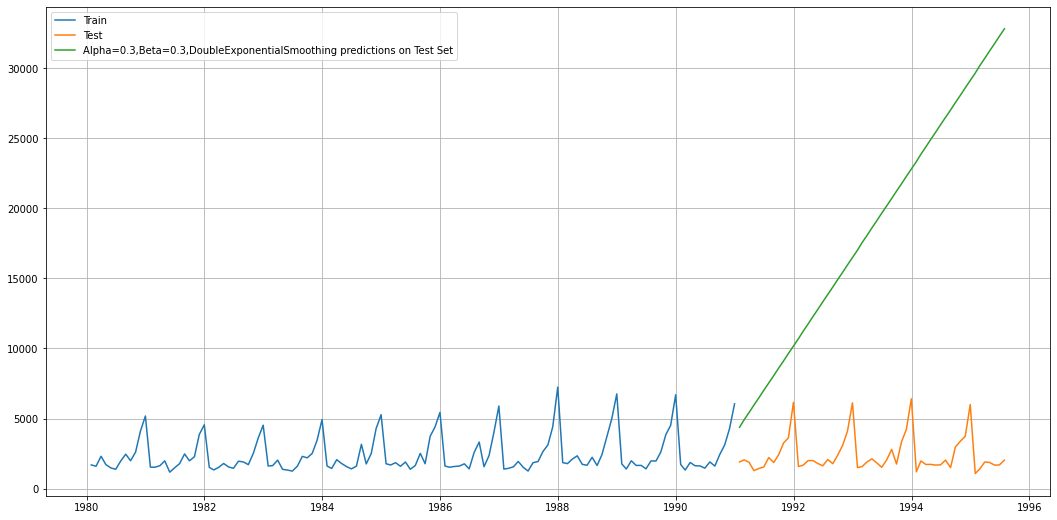

In [42]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [43]:
resultsdes = pd.DataFrame({'Test RMSE': [resultsde.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])
resultsdes

Test RMSE
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704

In [44]:
sparkling_resultses = pd.concat([results, resultsdes])
sparkling_resultses

Test RMSE
Alpha=0.995,Simple Exponential Smoothing        1275.081813
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704

# Triple Exponential smooting

In [45]:
TES_train = train_sparkling.copy()
TES_test = test_sparkling.copy()

model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

model_TES_autofit = model_TES.fit()

model_TES_autofit.params

## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_sparkling))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1602.230902
1991-02-28       2049   1374.018912
1991-03-31       1874   1807.607439
1991-04-30       1279   1704.811690
1991-05-31       1432   1602.617906

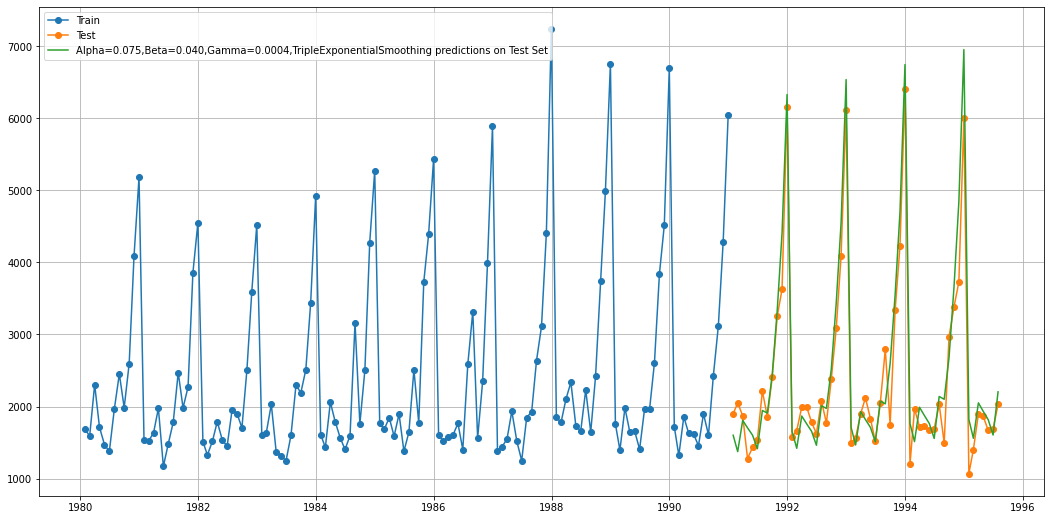

In [46]:
## Plotting on both the Training and Test using autofit
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train',marker="o")
plt.plot(TES_test['Sparkling'], label='Test',marker="o")
plt.plot(TES_test['auto_predict'], label='Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [47]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
resultste = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing'])
resultste

Test RMSE
Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExpon...  384.19775

In [48]:
## First we will define an empty dataframe to store our values from the loop
resultstes = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultstes

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [49]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultstes = resultstes.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)
            
resultstes

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.3          0.3           0.3     404.513320  3.927862e+02
1             0.3          0.3           0.4     402.088628  9.513202e+02
2             0.3          0.3           0.5     408.282432  1.470487e+03
3             0.3          0.3           0.6     428.631668  2.181724e+03
4             0.3          0.3           0.7     468.958530  3.513351e+03
..            ...          ...           ...            ...           ...
507           1.0          1.0           0.6  153394.791826  7.989790e+05
508           1.0          1.0           0.7   94040.964958  1.074413e+06
509           1.0          1.0           0.8  102196.953755  5.010607e+06
510           1.0          1.0           0.9   77924.294413  4.318265e+05
511           1.0          1.0           1.0  239917.432847  1.254280e+05

[512 rows x 5 columns]

In [50]:
resultstess = pd.DataFrame({'Test RMSE': [resultstes.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])
resultstess

Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...  392.786198

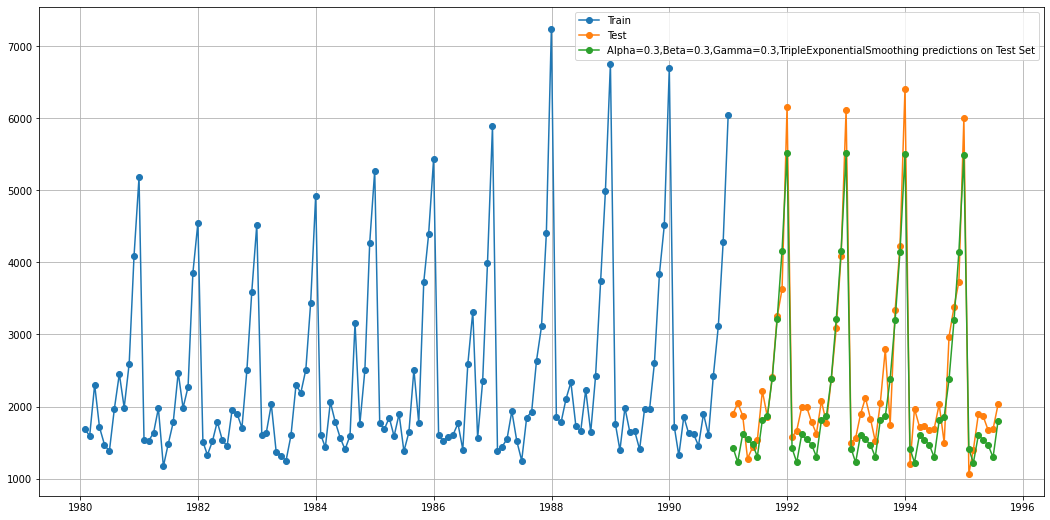

In [51]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train',marker="o")
plt.plot(TES_test['Sparkling'], label='Test',marker="o")
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set',marker="o")
plt.legend(loc='best')
plt.grid();

In [52]:
final_resultstes=pd.concat([resultste,resultstess])
final_resultstes

Test RMSE
Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExpon...  384.197750
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...  392.786198

In [53]:
sparkling_final_result_es=pd.concat([sparkling_resultses,final_resultstes])
sparkling_final_result_es

Test RMSE
Alpha=0.995,Simple Exponential Smoothing             1275.081813
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExpon...    384.197750
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198

# Linear Regression

In [54]:
train_time = [i+1 for i in range(len(train_sparkling))]
test_time = [i+133 for i in range(len(test_sparkling))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

LinearRegression_train_sparkling = train_sparkling.copy()
LinearRegression_test_sparkling = test_sparkling.copy()

LinearRegression_train_sparkling['time'] = train_time
LinearRegression_test_sparkling['time'] = test_time

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


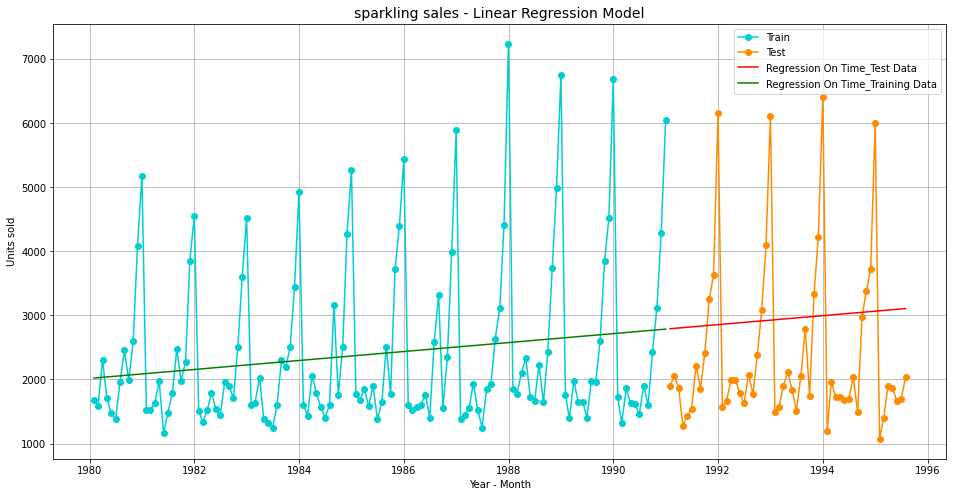

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train_sparkling[['time']],LinearRegression_train_sparkling['Sparkling'].values)
LinearRegression_train_sparkling['RegOnTime_sparkling'] = lr.predict(LinearRegression_train_sparkling[['time']])
LinearRegression_test_sparkling['RegOnTime_sparkling'] = lr.predict(LinearRegression_test_sparkling[['time']])

plt.figure(figsize=(16,8))
plt.plot( train_sparkling['Sparkling'], label='Train',color = 'darkturquoise',marker="o")
plt.plot(test_sparkling['Sparkling'], label='Test',color = 'darkorange',marker="o")
plt.plot(LinearRegression_test_sparkling['RegOnTime_sparkling'], label='Regression On Time_Test Data',color = 'red')
plt.plot(LinearRegression_train_sparkling['RegOnTime_sparkling'], label='Regression On Time_Training Data',color = 'green')
plt.title('sparkling sales - Linear Regression Model', fontsize = 14)
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.grid()

In [56]:
#model evalution
rmse_reg = np.sqrt(metrics.mean_squared_error(test_sparkling['Sparkling'],LinearRegression_test_sparkling['RegOnTime_sparkling']))
print("For Regression On Time forecast on the Test Data, RMSE is %3.3f " %(rmse_reg))


For Regression On Time forecast on the Test Data, RMSE is 1389.135 


In [57]:
sparkling_resultslr = pd.DataFrame({'Test RMSE': [rmse_reg]},index=['Linear Regression'])
sparkling_resultslr

Test RMSE
Linear Regression  1389.135175

# Moving Average

In [58]:
MovingAverage = df_sparkling.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

            Sparkling  ...  Sparkling_Trailing_9
Time_Stamp             ...                      
1980-01-31       1686  ...                   NaN
1980-02-29       1591  ...                   NaN
1980-03-31       2304  ...                   NaN
1980-04-30       1712  ...                   NaN
1980-05-31       1471  ...                   NaN

[5 rows x 5 columns]


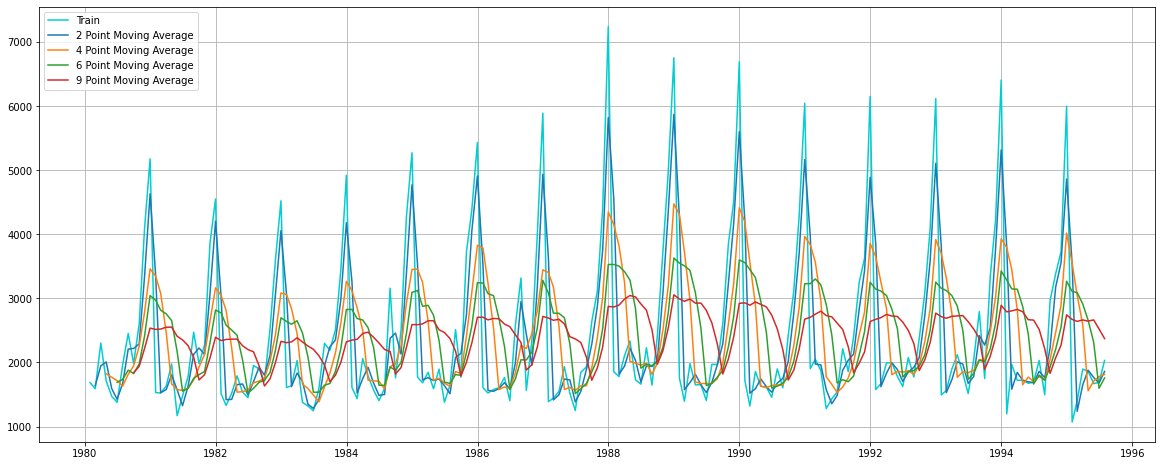

In [59]:
MovingAverage['Sparkling_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Sparkling_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Sparkling_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Sparkling_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

print(MovingAverage.head())

#plot
plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Sparkling'], label='Train', color='darkturquoise')
plt.plot(MovingAverage['Sparkling_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Sparkling_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Sparkling_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Sparkling_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

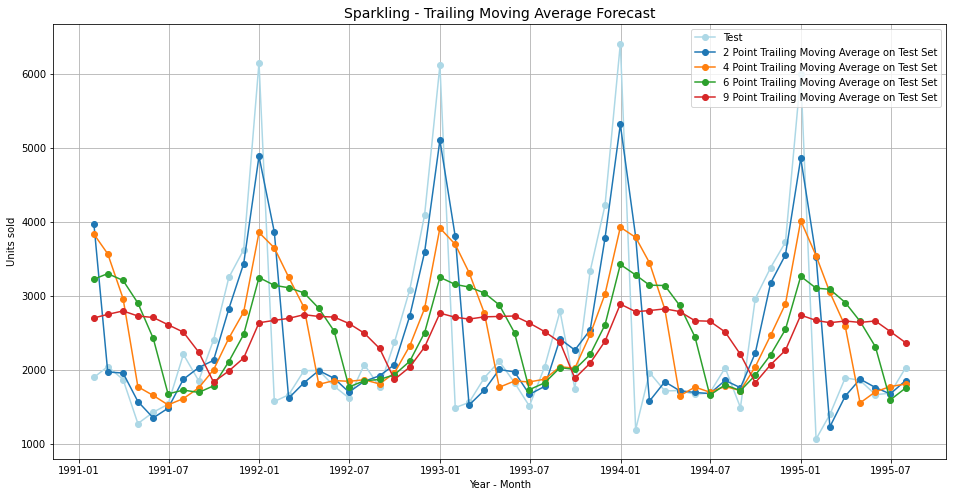

In [60]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

## Plotting on Test data

plt.figure(figsize=(16,8))
# plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'lightblue',marker="o")

plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_2'], label='2 Point Trailing Moving Average on Test Set',marker="o")
plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_4'], label='4 Point Trailing Moving Average on Test Set',marker="o")
plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set',marker="o")
plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set',marker="o")
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.grid()
plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14);

In [61]:
## Test Data - rmse_sparkling --> 2 point sparkling_Trailing MA
rmse_sparkling_MovingAverage_2 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_2'],squared=False)

## Test Data - rmse_sparkling --> 4 point sparkling_Trailing MA
rmse_sparkling_MovingAverage_4 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_4'],squared=False)

## Test Data - rmse_sparkling --> 6 point sparkling_Trailing MA
rmse_sparkling_MovingAverage_6 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_6'],squared=False)

## Test Data - rmse_sparkling --> 9 point sparkling_Trailing MA
rmse_sparkling_MovingAverage_9 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Sparkling_Trailing_9'],squared=False)

sparkling_resultsma = pd.DataFrame({'Test RMSE': [rmse_sparkling_MovingAverage_2,rmse_sparkling_MovingAverage_4,
                                             rmse_sparkling_MovingAverage_6,rmse_sparkling_MovingAverage_9]},
                              index=['For 2 point Moving Average','For 4 point Moving Average',
                                     'For 6 point Moving Average','For 9 point Moving Average'])
sparkling_resultsma

Test RMSE
For 2 point Moving Average   813.400684
For 4 point Moving Average  1156.589694
For 6 point Moving Average  1283.927428
For 9 point Moving Average  1346.278315

# Naive Model

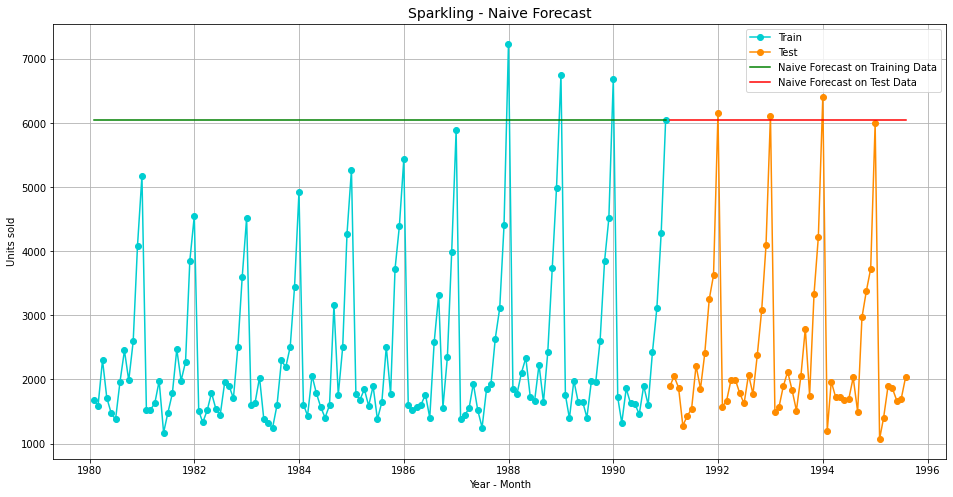

In [62]:
#model building
NaiveModel_train = train_sparkling.copy()
NaiveModel_test = test_sparkling.copy()
NaiveModel_test['sparkling_naive'] = np.asarray(train_sparkling['Sparkling'])[len(np.asarray(train_sparkling['Sparkling']))-1]
NaiveModel_train['sparkling_naive'] = np.asarray(train_sparkling['Sparkling'])[len(np.asarray(train_sparkling['Sparkling']))-1]

#plot
plt.figure(figsize=(16,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(test_sparkling['Sparkling'], label='Test', color = 'darkorange',marker="o")
plt.plot(NaiveModel_train['sparkling_naive'], label='Naive Forecast on Training Data', color = 'green')
plt.plot(NaiveModel_test['sparkling_naive'], label='Naive Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)
plt.grid()
plt.show();

In [63]:
rmse_naive = metrics.mean_squared_error(test_sparkling['Sparkling'],NaiveModel_test['sparkling_naive'],squared=False)
sparkling_resultsnm = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['Naive Model'])
sparkling_resultsnm

Test RMSE
Naive Model  3864.279352

# Simple Average

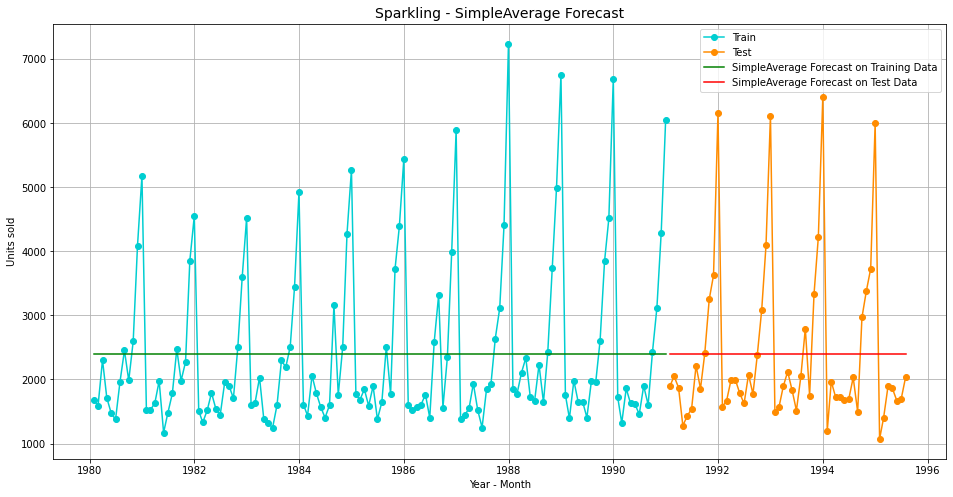

In [64]:
SimpleAverage_train = train_sparkling.copy()
SimpleAverage_test = test_sparkling.copy()

SimpleAverage_train['sparkling_mean_forecast'] = train_sparkling['Sparkling'].mean()
SimpleAverage_test['sparkling_mean_forecast'] = train_sparkling['Sparkling'].mean()

plt.figure(figsize=(16,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(test_sparkling['Sparkling'], label='Test', color = 'darkorange',marker="o")
plt.plot(SimpleAverage_train['sparkling_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'green')
plt.plot(SimpleAverage_test['sparkling_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)
plt.grid()
plt.show()

In [65]:
rmse_simple_avg = metrics.mean_squared_error(test_sparkling['Sparkling'],SimpleAverage_test['sparkling_mean_forecast'],squared=False)
sparkling_resultssa = pd.DataFrame({'Test RMSE': [rmse_simple_avg]},index=['SimpleAverage'])
sparkling_resultssa

Test RMSE
SimpleAverage  1275.081804

In [66]:
sparkling_results = pd.concat([sparkling_resultsma, sparkling_resultslr,sparkling_resultssa,sparkling_resultsnm])
sparkling_results

Test RMSE
For 2 point Moving Average   813.400684
For 4 point Moving Average  1156.589694
For 6 point Moving Average  1283.927428
For 9 point Moving Average  1346.278315
Linear Regression           1389.135175
SimpleAverage               1275.081804
Naive Model                 3864.279352

Comparing various exponential smoothing models

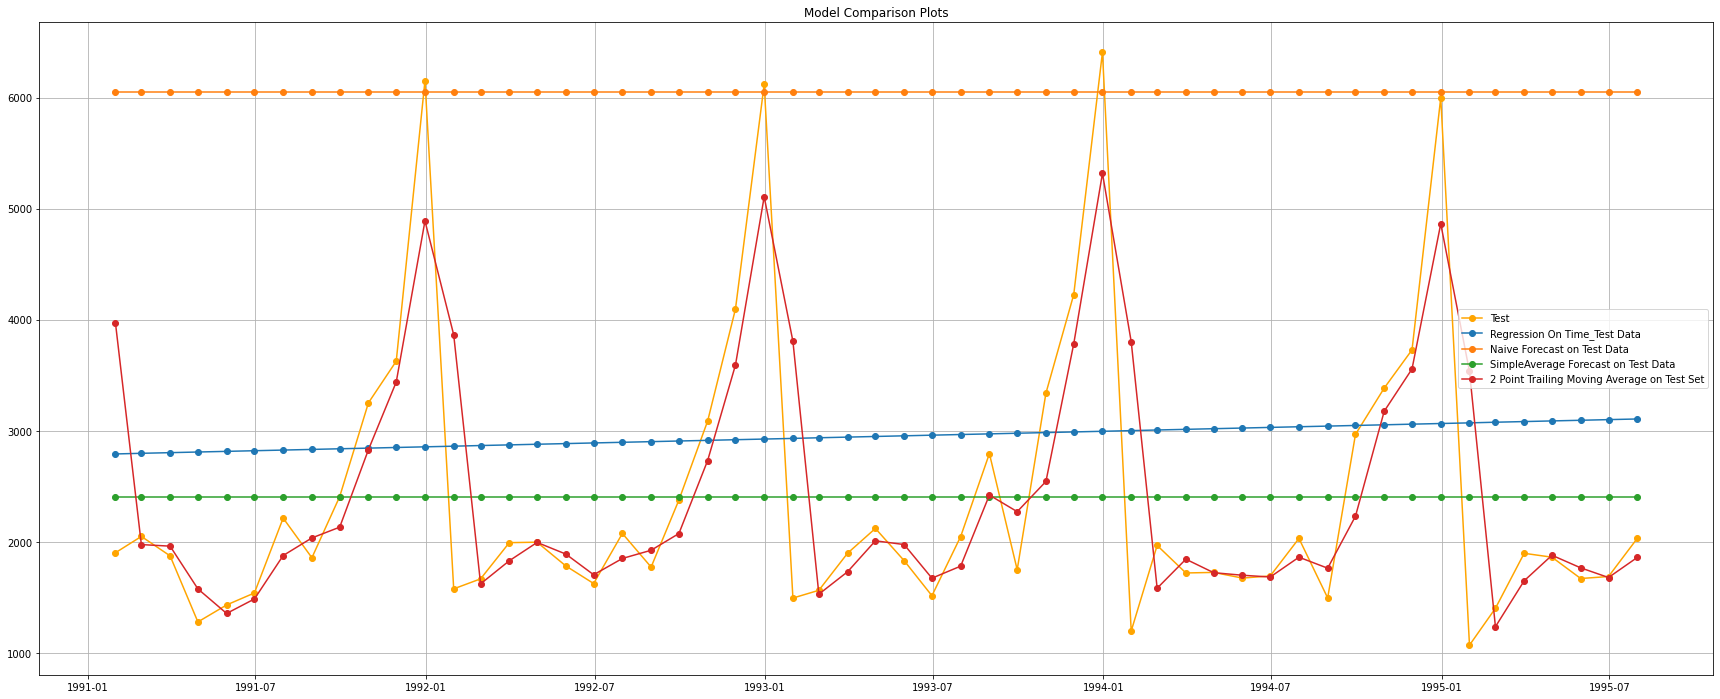

In [67]:
## Plotting on Test data

plt.figure(figsize=(30,12))
# plt.plot(train_sparkling['Sparkling'], label='Train',color = 'darkturquoise',marker="o")
plt.plot(test_sparkling['Sparkling'], label='Test',color = 'orange',marker="o")

plt.plot(LinearRegression_test_sparkling['RegOnTime_sparkling'], label='Regression On Time_Test Data',marker="o")

plt.plot(NaiveModel_test['sparkling_naive'], label='Naive Forecast on Test Data',marker="o")

plt.plot(SimpleAverage_test['sparkling_mean_forecast'], label='SimpleAverage Forecast on Test Data',marker="o")

plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_2'], label='2 Point Trailing Moving Average on Test Set',marker="o")

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [68]:
RMSE_values=pd.concat([sparkling_results,sparkling_final_result_es])
RMSE_values

Test RMSE
For 2 point Moving Average                            813.400684
For 4 point Moving Average                           1156.589694
For 6 point Moving Average                           1283.927428
For 9 point Moving Average                           1346.278315
Linear Regression                                    1389.135175
SimpleAverage                                        1275.081804
Naive Model                                          3864.279352
Alpha=0.995,Simple Exponential Smoothing             1275.081813
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExpon...    384.197750
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198

In [69]:
RMSE_values=pd.concat([sparkling_results,sparkling_final_result_es]).sort_values(by=['Test RMSE'])
RMSE_values

Test RMSE
Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExpon...    384.197750
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
For 2 point Moving Average                            813.400684
For 4 point Moving Average                           1156.589694
SimpleAverage                                        1275.081804
Alpha=0.995,Simple Exponential Smoothing             1275.081813
For 6 point Moving Average                           1283.927428
For 9 point Moving Average                           1346.278315
Linear Regression                                    1389.135175
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Naive Model                                          3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

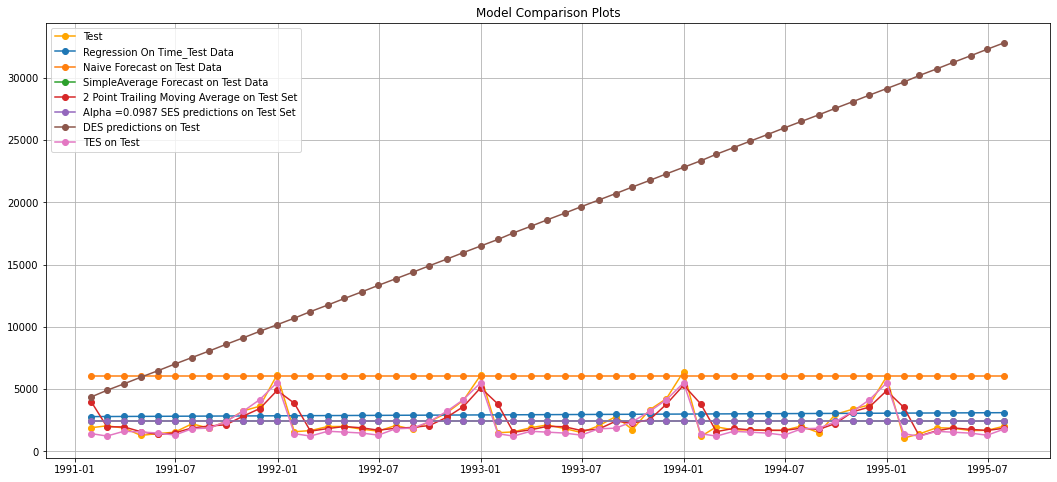

In [70]:
## Plotting on Test data

plt.figure(figsize=(18,8))
# plt.plot(train_sparkling['Sparkling'], label='Train',color = 'darkturquoise',marker="o")
plt.plot(test_sparkling['Sparkling'], label='Test',color = 'orange',marker="o")

plt.plot(LinearRegression_test_sparkling['RegOnTime_sparkling'], label='Regression On Time_Test Data',marker="o")

plt.plot(NaiveModel_test['sparkling_naive'], label='Naive Forecast on Test Data',marker="o")

plt.plot(SimpleAverage_test['sparkling_mean_forecast'], label='SimpleAverage Forecast on Test Data',marker="o")

plt.plot(trailing_MovingAverage_test['Sparkling_Trailing_2'], label='2 Point Trailing Moving Average on Test Set',marker="o")

##SES Optimised at alpha=0.0987
plt.plot(SES_test['predict'], label='Alpha =0.0987 SES predictions on Test Set',marker="o")
#DES iterative at alpha=0.1 and beta=0.1
plt.plot(DES_test['predict', 0.3, 0.3], label='DES predictions on Test',marker="o")
#TES iterative at alpha=0.075, beta=0.04 and gamma=0.0004
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='TES on Test',marker="o")
#plt.plot(TES_test['predict', 0.075, 0.040, 0.0004], label='TES on Test',marker="o")

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Building ARIMA/ SARIMA model

6.	Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Auto ARIMA

In [71]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [72]:
import pandas as pd
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [73]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sparkling['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436793315
ARIMA(0, 1, 2) - AIC:2232.783097684156
ARIMA(1, 1, 0) - AIC:2268.5280608424086
ARIMA(1, 1, 1) - AIC:2235.0139453494617
ARIMA(1, 1, 2) - AIC:2233.597647119246
ARIMA(2, 1, 0) - AIC:2262.0356000662723
ARIMA(2, 1, 1) - AIC:2232.3604898806984
ARIMA(2, 1, 2) - AIC:2210.6194557985136


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [74]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.619456
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [75]:
#(0, 1, 2) AIC=1276.835382
auto_ARIMA = ARIMA(train_sparkling['Sparkling'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1112.392
Method:                       css-mle   S.D. of innovations           1159.696
Date:                Thu, 03 Mar 2022   AIC                           2232.783
Time:                        10:51:02   BIC                           2244.284
Sample:                    02-29-1980   HQIC                          2237.456
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2470      3.800      1.644      0.103      -1.201      13.695
ma.L1.D.Sparkling    -0.5555      0.073     -7.583      0.000      -0.699      -0.412
ma.L2.D.Sparkling    -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [76]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_sparkling['Sparkling']))

In [77]:
rmse_arima_auto_model = metrics.mean_squared_error(test_sparkling['Sparkling'],predicted_auto_ARIMA[0],squared=False)
results_auto_ARIMA = pd.DataFrame({'Test RMSE': [rmse_arima_auto_model]}
                           ,index=['Auto_ARIMA(0, 1, 2)'])
results_auto_ARIMA

Test RMSE
Auto_ARIMA(0, 1, 2)  1417.497469

Auto SARIMA

In [78]:
SARIMA_train = train_sparkling.copy()
SARIMA_test = test_sparkling.copy()

In [79]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [80]:
SARIMA_AIC_sparkling = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_sparkling

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [81]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_sparkling = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_sparkling = SARIMA_model_sparkling.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_sparkling.aic))
        SARIMA_AIC_sparkling = SARIMA_AIC_sparkling.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_sparkling.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678706
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574251195
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908185605
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.528962130772
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866722
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.991155365916
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828372
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.663923423011
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1399.108384667994
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.8594819023863
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.8550259196254
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.6709524136718
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1428.2448811162574
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1429.6168027963402
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.63858884471

In [82]:
SARIMA_AIC_sparkling.sort_values(by=['AIC']).head()

param       seasonal          AIC
47  (1, 1, 2)  (0, 1, 2, 12)  1382.347780
20  (0, 1, 2)  (0, 1, 2, 12)  1382.484254
50  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
74  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
23  (0, 1, 2)  (1, 1, 2, 12)  1384.398867

In [83]:
#(0, 1, 2)*(2, 1, 2, 12) AIC=774.969120
auto_SARIMA_sparkling = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_sparkling = auto_SARIMA_sparkling.fit(maxiter=1000)
print(results_auto_SARIMA_sparkling.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -686.012
Date:                            Thu, 03 Mar 2022   AIC                           1386.024
Time:                                    10:52:37   BIC                           1403.676
Sample:                                         0   HQIC                          1393.148
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8016      0.192     -4.186      0.000      -1.177      -0.426
ma.L2         -0.2427      0.132   

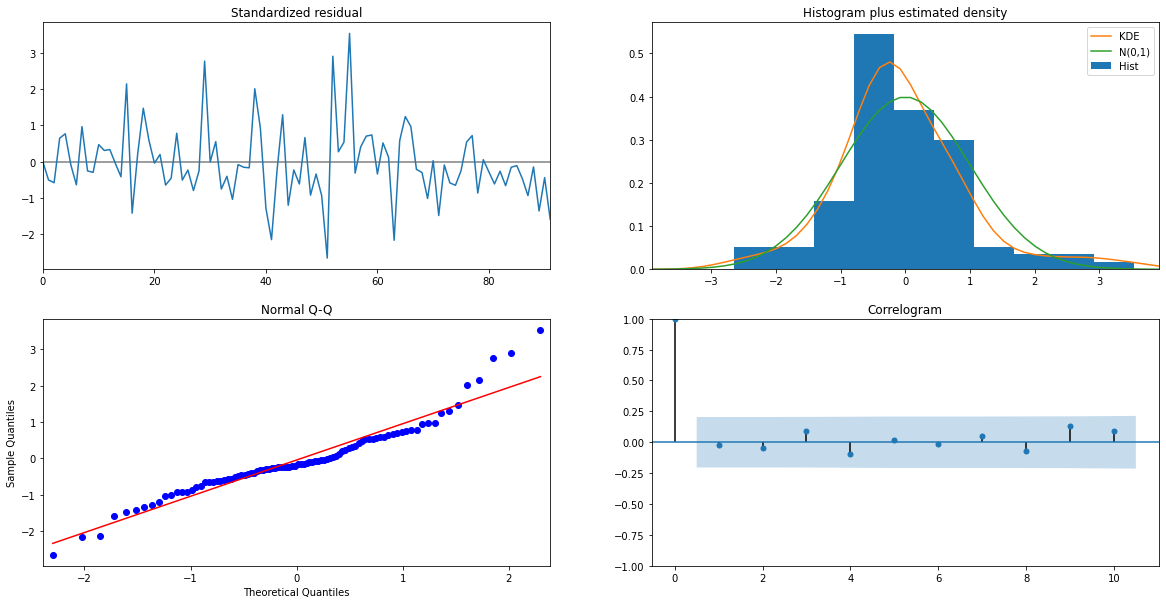

In [84]:
results_auto_SARIMA_sparkling.plot_diagnostics(figsize=(20, 10))
plt.show()

In [85]:
predicted_auto_SARIMA = results_auto_SARIMA_sparkling.get_forecast(steps=len(SARIMA_test['Sparkling']))
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1575.984117  416.793404     759.084057    2392.884177
1  1408.296427  431.609325     562.357694    2254.235159
2  1898.471279  431.977169    1051.811586    2745.130973
3  1745.278134  432.344683     897.898128    2592.658141
4  1632.310966  432.711884     784.211256    2480.410675

In [86]:
# Extract the predicted and true values of our time series
sparkling_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['sparkling_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

Sparkling  sparkling_forecasted
Time_Stamp                                 
1991-01-31       1902           1575.984117
1991-02-28       2049           1408.296427
1991-03-31       1874           1898.471279
1991-04-30       1279           1745.278134
1991-05-31       1432           1632.310966

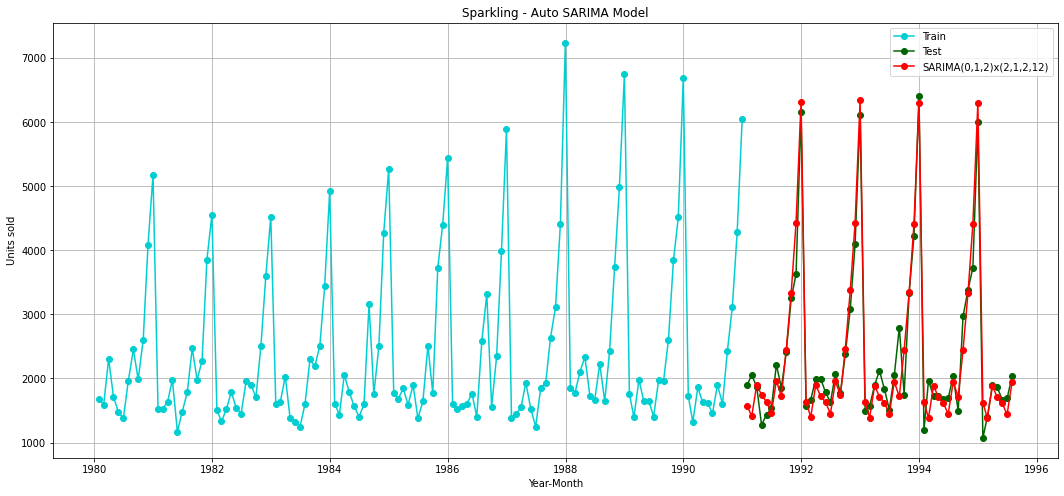

In [87]:
plt.figure(figsize=(18, 8))
plt.grid()
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'darkgreen',marker="o")
plt.plot(SARIMA_test['sparkling_forecasted'], color='red', label='SARIMA(0,1,2)x(2,1,2,12)',marker="o")
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best');

In [88]:
rmse_SARIMA_auto_model = metrics.mean_squared_error(SARIMA_test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
results_auto_SARIMA = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model]}
                           ,index=['Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)'])
results_auto_SARIMA

Test RMSE
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)  327.523552

Auto SARIMA on log series

7.	Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training 

In [89]:
sparkling_log_train = np.log10(SARIMA_train['Sparkling'])

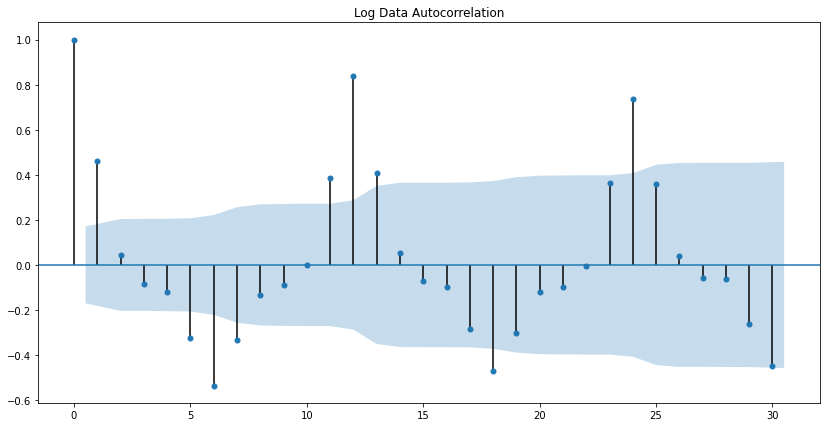

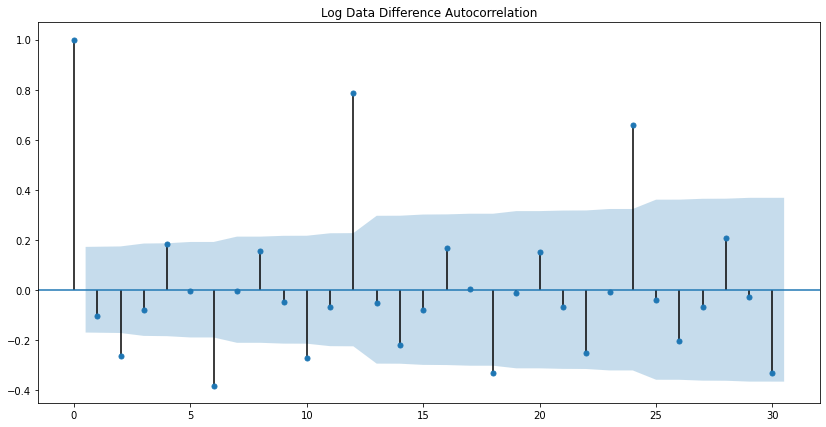

In [90]:
plot_acf(sparkling_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(sparkling_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

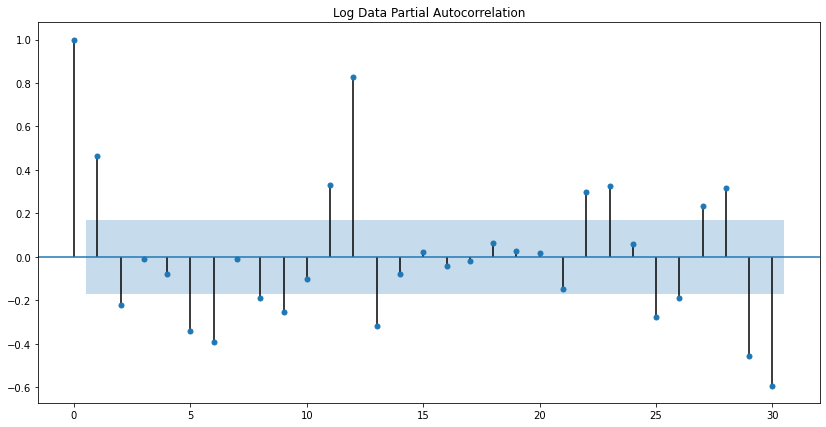

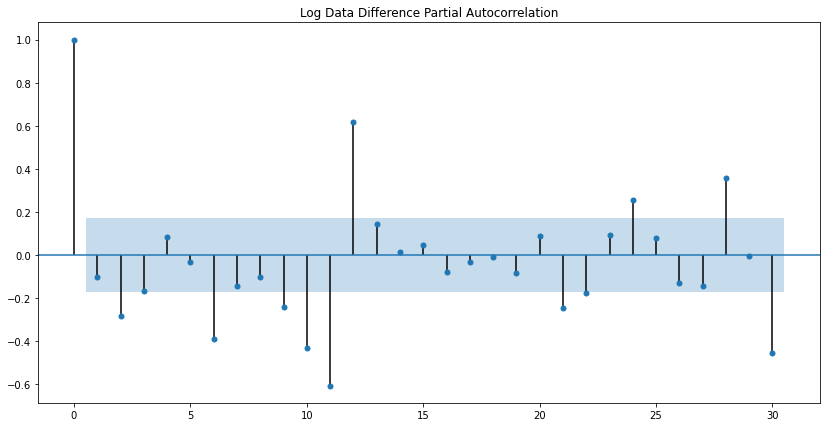

In [91]:
plot_pacf(sparkling_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(sparkling_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

In [92]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [93]:
SARIMA_AIC_sparkling_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_sparkling_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [94]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_sparkling_log = sm.tsa.statespace.SARIMAX(sparkling_log_train,#train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_sparkling_log = SARIMA_model_sparkling_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_sparkling_log.aic))
        SARIMA_AIC_sparkling_log = SARIMA_AIC_sparkling_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_sparkling_log.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.223163262272436
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.8182946997843


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.07304219597543
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.9106449323919
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.21040854931346


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.1137826922098
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527740108477


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.19047183384725
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.41328509954727
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913579723048


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.67576097383633


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.2889256362272
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.15491722268666


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.3058030972265


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.59900295434645


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.2279754117122


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.2356671597419


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-170.87276452142362
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:-57.792168937934264
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:-122.23260707016084


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:-138.43622721619602
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:-256.1029414746174


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:-253.58476383868287


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:-218.5589675450778
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:-261.5468767508341


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:-284.47203173603276


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:-244.46391666423742


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:-248.20817503293532


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:-247.01117648031112


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:-217.72696369940513


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:-246.5064250009987


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:-250.67711471291972


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:-245.27764698088754


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:-220.45389876464563


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:-218.54809461094078


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:-211.89408896622191
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.16430408209354


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:-153.63447338593494


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:-164.74663632469804
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:-259.9213971380586


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:-249.2089036028264


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:-218.57705256832534
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:-266.2376521179501


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:-281.5679963198811


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.8656038212091


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:-248.0109055693165


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.46916408389447


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:-217.11584475183855


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:-247.0455534636177


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:-248.9518534294961


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:-241.8110924465057


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:-219.9626672411445


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:-217.98044554104558


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:-213.24054164355405
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-56.62659251170256
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.23327148300478


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.12305940760186
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:-224.95834447088674


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:-223.18645057483576


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:-189.47871159174014


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:-228.63007982341907


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:-249.99948142270637


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:-214.3002159251909
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:-213.86263437482162


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:-216.48481536767974


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:-188.4334388850912


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:-213.368935804479


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:-214.3426163082145


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:-215.10138436502612


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:-189.15129796177274


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:-187.38243000553373


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:-185.46983517713693
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:-85.03639777159046


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:-149.54590382173683


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:-162.40934285968893
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:-259.5571087947887


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:-252.2829163754909


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:-217.36138029879925
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:-262.83785071105183

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:-282.517334940732


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:-242.95734883281597


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:-245.28012056808117


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:-245.4759926049208


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:-216.42210426578538


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:-243.3531328820672


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:-246.28353931202025


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:-243.80122609261144


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:-217.23881434286102


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:-215.26243516875724


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.76635670221165
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.29031319775422


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:-152.23666213439984


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:-162.99564187514417


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:-257.95070697032406


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:-248.10670043760092


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:-217.83615465317015


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:-263.8747926812777
SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:-279.611702360819


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:-241.40198760924304


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:-244.06388396350846


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.3330293851293


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:-216.13566249213616


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:-242.55771224469626


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:-246.01519730661892


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:-240.8586697370323


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:-216.27722315181555


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:-214.390307593125


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:-212.14297968776094
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:-64.48764897312675
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:-132.5965755702868


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:-146.2019588875139
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:-232.98423261209737


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:-235.64046514125013


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:-200.4940606522489


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:-235.30925300886778


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:-260.82997642284397


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:-225.63629335295784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:-222.18306940387495


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:-225.26416894243224


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:-199.4669435025926


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:-220.76971048925176


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:-223.23027060074634


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:-224.34361807751057


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:-198.80917229196422


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:-196.8311069916263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:-194.94138821895808
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:-88.27946166446134


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:-154.3803985236351


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-166.23126991995397


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-257.7015030494836
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-250.3725479330978


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-215.46643808430872


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-259.4933658697076


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-278.28822190699276


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-241.07884785625814


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-240.35091541262864


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-243.4777936723351


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-214.6815198774897


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-238.95953090103617


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-240.74711980232996
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-242.05114606759048


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-212.29558551279192


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-210.33407185738275


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-208.79632028825873
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-96.13368009068732


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.71495129294985


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.9416814522741


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.6037399479872


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.5966591049944


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.8980574154602


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.3087481737429


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.8803252125578


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.40945510218114


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.33411958558852


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.34985345816088


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22803554018094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.96032499625187


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.5724117531605


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.10205326465564


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.45849668930776


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.4938258461664


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.14886476962644


In [95]:
SARIMA_AIC_sparkling_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517335
43   (0, 1, 2)  (1, 0, 1, 12) -281.567996
97   (1, 1, 2)  (1, 0, 1, 12) -279.611702
133  (2, 1, 1)  (1, 0, 1, 12) -278.288222

In [96]:
#(0, 1, 1)*(1, 0, 1, 12) AIC=-247.076408
import statsmodels.api as sm

auto_SARIMA_sparkling_log = sm.tsa.statespace.SARIMAX(sparkling_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_sparkling_log = auto_SARIMA_sparkling_log.fit(maxiter=1000)
print(results_auto_SARIMA_sparkling_log.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Thu, 03 Mar 2022   AIC                           -284.472
Time:                                    10:55:37   BIC                           -273.423
Sample:                                01-31-1980   HQIC                          -279.986
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.862      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

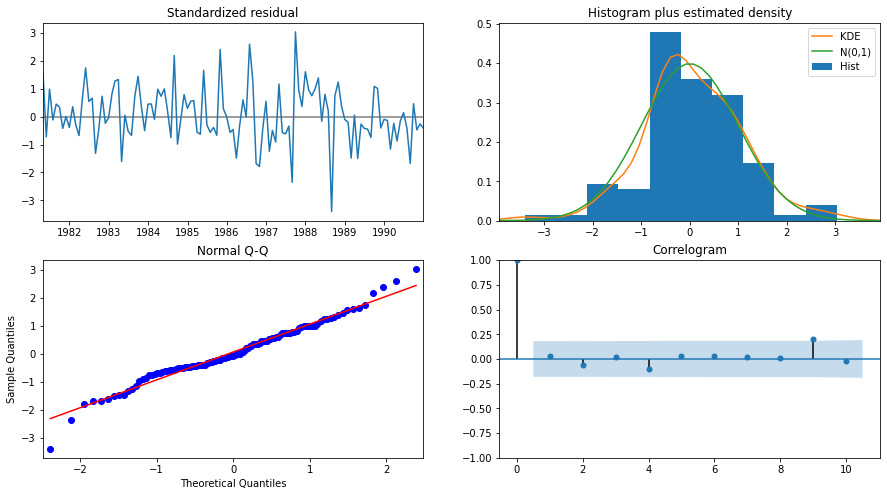

In [97]:
results_auto_SARIMA_sparkling_log.plot_diagnostics(figsize=(15,8))
plt.show()

In [98]:
predicted_auto_SARIMA_sparkling_log = results_auto_SARIMA_sparkling_log.get_forecast(steps=len(SARIMA_test['Sparkling']))

In [99]:
predicted_auto_SARIMA_sparkling_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3.212032  0.067108       3.080502       3.343561
1991-02-28  3.141307  0.067465       3.009078       3.273535
1991-03-31  3.256286  0.067821       3.123360       3.389212
1991-04-30  3.226732  0.068175       3.093112       3.360351
1991-05-31  3.195788  0.068527       3.061478       3.330098

In [100]:
# Extract the predicted and true values of our time series
sparkling_forecasted_log = predicted_auto_SARIMA_sparkling_log.predicted_mean
SARIMA_test['sparkling_forecasted_log'] = np.power(10, predicted_auto_SARIMA_sparkling_log.predicted_mean)
SARIMA_test.head()

Sparkling  sparkling_forecasted  sparkling_forecasted_log
Time_Stamp                                                           
1991-01-31       1902           1575.984117               1629.414813
1991-02-28       2049           1408.296427               1384.544562
1991-03-31       1874           1898.471279               1804.204260
1991-04-30       1279           1745.278134               1685.511608
1991-05-31       1432           1632.310966               1569.595962

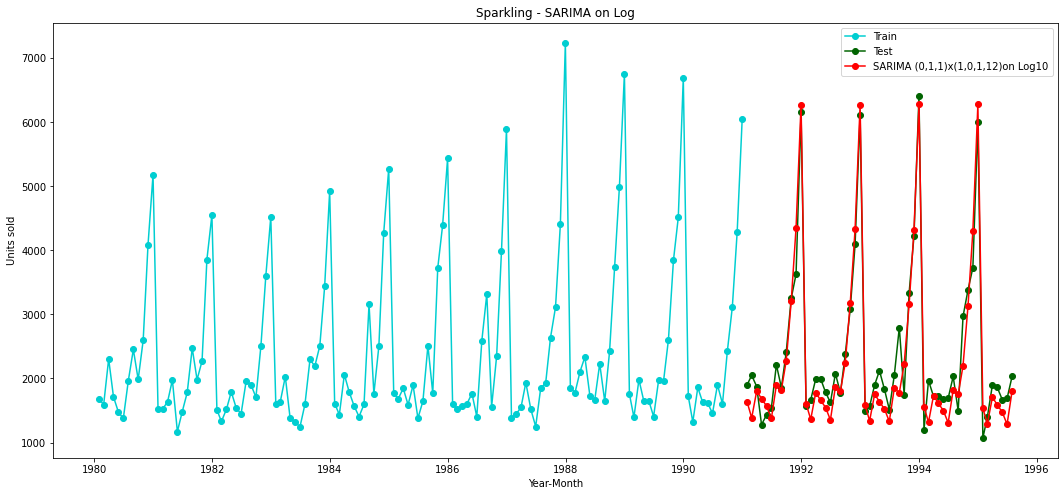

In [101]:
plt.figure(figsize=(18,8))
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'darkgreen',marker="o")

plt.plot(SARIMA_test['sparkling_forecasted_log'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10',marker="o")
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best');

In [102]:
rmse_SARIMA_auto_model_log = metrics.mean_squared_error(SARIMA_test['Sparkling'],SARIMA_test['sparkling_forecasted_log'],squared=False)

results_SARIMA_auto_model_log = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model_log]}
                           ,index=['Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)'])

results_SARIMA_auto_model_log

Test RMSE
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)  336.800446

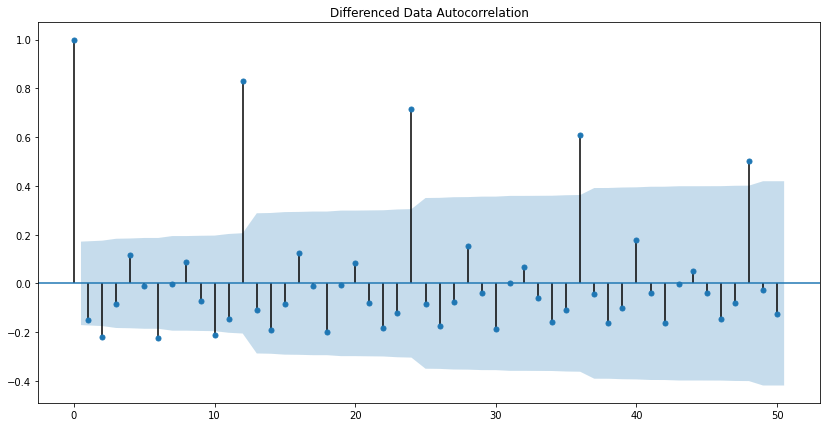

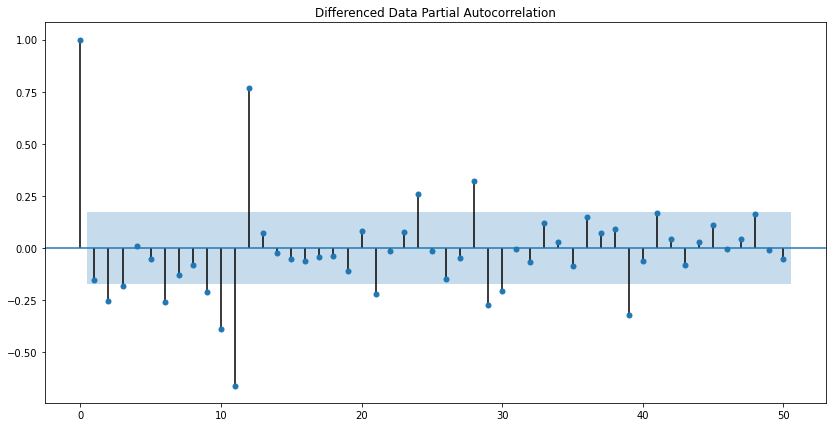

In [103]:
plot_acf(train_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [104]:
manual_ARIMA = ARIMA(train_sparkling['Sparkling'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Thu, 03 Mar 2022   AIC                           2269.583
Time:                        10:55:39   BIC                           2275.333
Sample:                    02-29-1980   HQIC                          2271.919
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.783    -202.667     269.248


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [105]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_sparkling['Sparkling']))
rmse_arima_manual_model = metrics.mean_squared_error(test_sparkling['Sparkling'],predicted_manual_ARIMA[0],squared=False)

results_arima_manual = pd.DataFrame({'Test RMSE': [rmse_arima_manual_model]}
                           ,index=['Manual_ARIMA(0,1,0)'])
results_arima_manual

Test RMSE
Manual_ARIMA(0,1,0)  4779.154299

Manual SARIMA

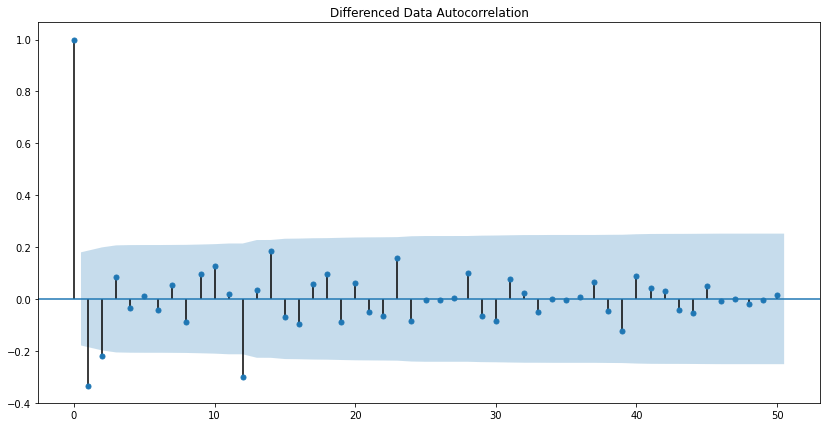

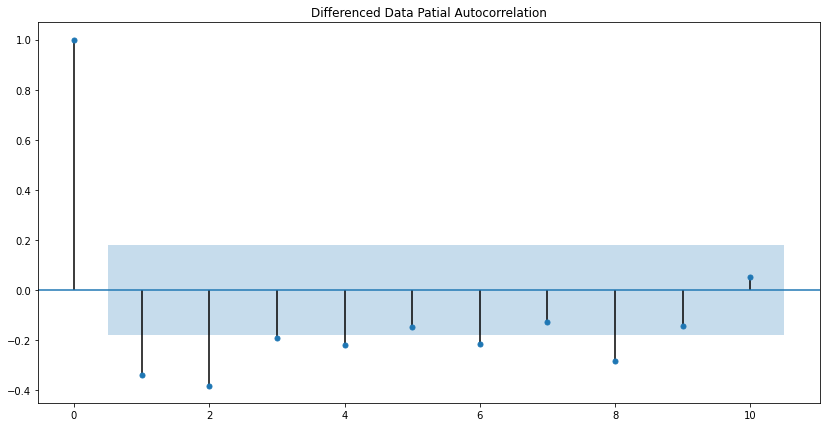

In [106]:
plot_acf((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [107]:
#(4, 1, 2)*(0, 1, 2, 12)
manual_SARIMA_sparkling = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_sparkling = manual_SARIMA_sparkling.fit(maxiter=1000)
print(results_manual_SARIMA_sparkling.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -684.793
Date:                            Thu, 03 Mar 2022   AIC                           1387.586
Time:                                    10:55:42   BIC                           1410.283
Sample:                                         0   HQIC                          1396.747
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4852      0.368     -1.320      0.187      -1.206       0.235
ar.L2          0.0471      0.178   

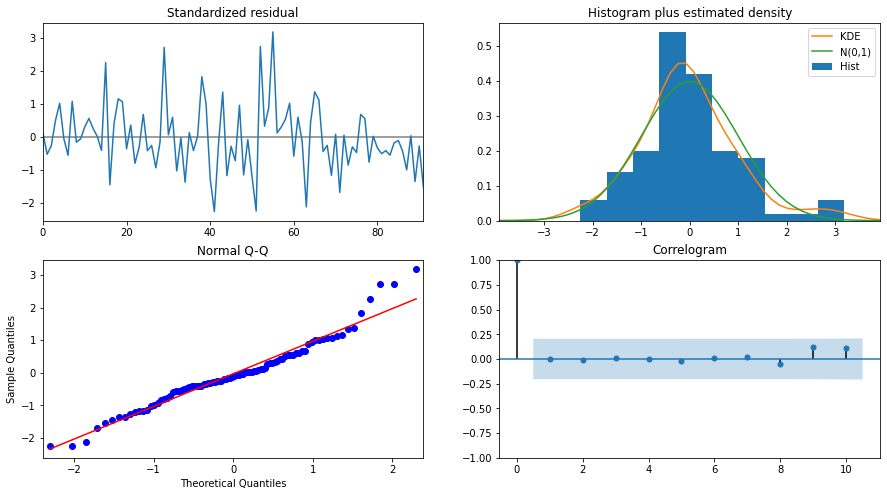

In [108]:
results_manual_SARIMA_sparkling.plot_diagnostics(figsize=(15,8))
plt.show()

In [109]:
predicted_manual_SARIMA = results_manual_SARIMA_sparkling.get_forecast(steps=len(SARIMA_test['Sparkling']))
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1456.664790  410.839074     651.435002    2261.894578
1  1420.649095  428.190872     581.410409    2259.887782
2  1758.013686  428.194399     918.768085    2597.259286
3  1714.217267  432.770137     866.003385    2562.431149
4  1547.736539  432.932875     699.203696    2396.269382

In [110]:
# Extract the predicted and true values of our time series
manual_sparkling_forecasted = predicted_manual_SARIMA.predicted_mean
SARIMA_test['manual_sparkling_forecasted'] = predicted_manual_SARIMA.predicted_mean
SARIMA_test.head()

Sparkling  ...  manual_sparkling_forecasted
Time_Stamp             ...                             
1991-01-31       1902  ...                  1456.664790
1991-02-28       2049  ...                  1420.649095
1991-03-31       1874  ...                  1758.013686
1991-04-30       1279  ...                  1714.217267
1991-05-31       1432  ...                  1547.736539

[5 rows x 4 columns]

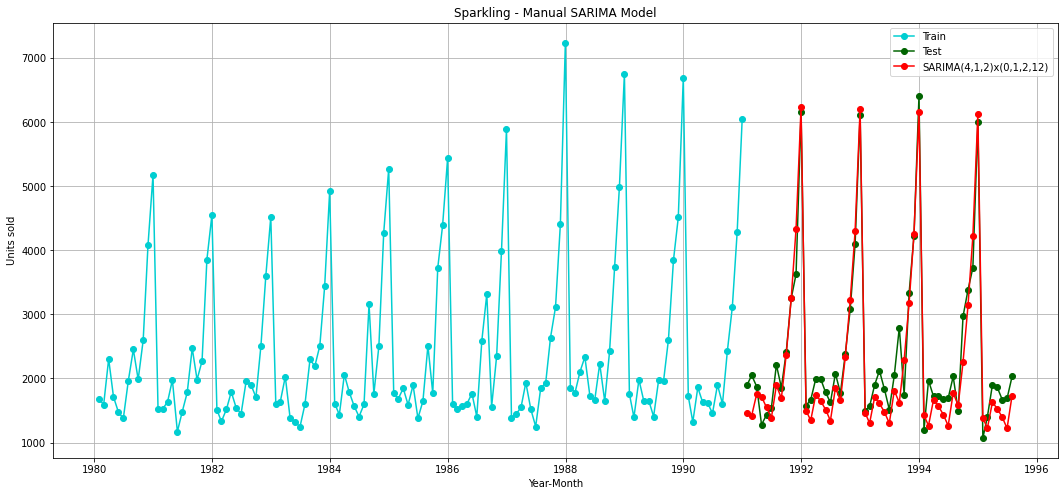

In [111]:
plt.figure(figsize=(18,8))
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'darkgreen',marker="o")

plt.plot(SARIMA_test['manual_sparkling_forecasted'], color='red', label='SARIMA(4,1,2)x(0,1,2,12)',marker="o")
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.grid()
plt.title('Sparkling - Manual SARIMA Model')
plt.legend(loc='best');

In [112]:
rmse_SARIMA_manual_model = metrics.mean_squared_error(SARIMA_test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
results_SARIMA_manual = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual_model]}
                           ,index=['Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)'])
results_SARIMA_manual


Test RMSE
Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)  352.111648

In [113]:
results_of_ARIMA_SARIMA=pd.concat([results_auto_ARIMA, results_auto_SARIMA, results_SARIMA_auto_model_log, results_arima_manual,results_SARIMA_manual])
results_of_ARIMA_SARIMA

Test RMSE
Auto_ARIMA(0, 1, 2)                     1417.497469
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)       327.523552
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)   336.800446
Manual_ARIMA(0,1,0)                     4779.154299
Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)     352.111648

In [114]:
all_models_RMSE_values=pd.concat([RMSE_values,results_of_ARIMA_SARIMA])
all_models_RMSE_values

Test RMSE
Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExpon...    384.197750
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
For 2 point Moving Average                            813.400684
For 4 point Moving Average                           1156.589694
SimpleAverage                                        1275.081804
Alpha=0.995,Simple Exponential Smoothing             1275.081813
For 6 point Moving Average                           1283.927428
For 9 point Moving Average                           1346.278315
Linear Regression                                    1389.135175
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Naive Model                                          3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Auto_ARIMA(0, 1, 2)                                  1417.497469
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)                    327.523552
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)                336.800446
Manual_ARIMA(0,1,0)                                  4779.154299
Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)                  352.111648

In [115]:
all_models_RMSE_values=pd.concat([RMSE_values,results_of_ARIMA_SARIMA]).sort_values(by=['Test RMSE'])
all_models_RMSE_values

Test RMSE
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)                    327.523552
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)                336.800446
Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)                  352.111648
Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExpon...    384.197750
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
For 2 point Moving Average                            813.400684
For 4 point Moving Average                           1156.589694
SimpleAverage                                        1275.081804
Alpha=0.995,Simple Exponential Smoothing             1275.081813
For 6 point Moving Average                           1283.927428
For 9 point Moving Average                           1346.278315
Linear Regression                                    1389.135175
Auto_ARIMA(0, 1, 2)                                  1417.497469
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Naive Model                                          3864.279352
Manual_ARIMA(0,1,0)                                  4779.154299
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

# Building the Auto SARIMA model for future forcasting

9.	Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [116]:
auto_SARIMA_sparkling_full = sm.tsa.statespace.SARIMAX(df_sparkling['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_sparkling_full = auto_SARIMA_sparkling_full.fit(maxiter=1000)
print(results_auto_SARIMA_sparkling_full.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1086.677
Date:                            Thu, 03 Mar 2022   AIC                           2187.354
Time:                                    10:55:47   BIC                           2208.287
Sample:                                         0   HQIC                          2195.860
                                            - 187                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8428      0.083    -10.102      0.000      -1.006      -0.679
ma.L2         -0.1084      0.088   

In [117]:
Forecast_auto_SARIMA = results_auto_SARIMA_sparkling_full.get_forecast(steps=12)
rmse_spark_Full = metrics.mean_squared_error(df_sparkling['Sparkling'],results_auto_SARIMA_sparkling_full.fittedvalues,squared=False)

Forecast_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2014.462525  383.795001    1262.238145    2766.686905
1  2421.766867  388.528765    1660.264480    3183.269254
2  3300.927328  388.984362    2538.531987    4063.322668
3  3997.243829  389.440524    3233.954428    4760.533230
4  6136.266264  389.897449    5372.081306    6900.451221

In [118]:
Forecast_auto_SARIMA_date = Forecast_auto_SARIMA.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))
Forecast_auto_SARIMA_date

y                  mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  2014.462525  383.795001    1262.238145    2766.686905
1995-09-30  2421.766867  388.528765    1660.264480    3183.269254
1995-10-31  3300.927328  388.984362    2538.531987    4063.322668
1995-11-30  3997.243829  389.440524    3233.954428    4760.533230
1995-12-31  6136.266264  389.897449    5372.081306    6900.451221
1996-01-31  1292.782439  390.353005     527.704607    2057.860270
1996-02-29  1614.223042  390.803090     848.263059    2380.183024
1996-03-31  1843.034348  391.227206    1076.243114    2609.825581
1996-04-30  1798.793485  391.670761    1031.132900    2566.454070
1996-05-31  1659.573748  392.116939     891.038669    2428.108827
1996-06-30  1624.313883  392.564175     854.902238    2393.725528
1996-07-31  2025.739982  393.012340    1255.449950    2796.030014

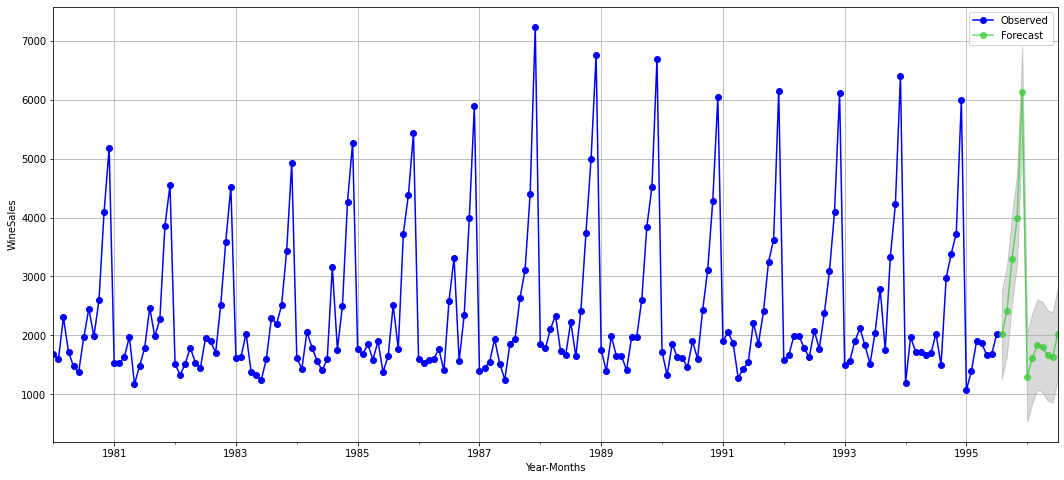

In [119]:
# plot the forecast along with the confidence band
plt.figure(figsize=(18,8))
axis = df_sparkling['Sparkling'].plot(label='Observed',color="blue",marker="o")
Forecast_auto_SARIMA_date['mean'].plot(ax=axis, label='Forecast', color="limegreen", alpha=0.7,marker="o")
axis.fill_between(Forecast_auto_SARIMA_date.index, Forecast_auto_SARIMA_date['mean_ci_lower'], 
                  Forecast_auto_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('WineSales')
plt.grid()
plt.legend(loc='best')
plt.show()

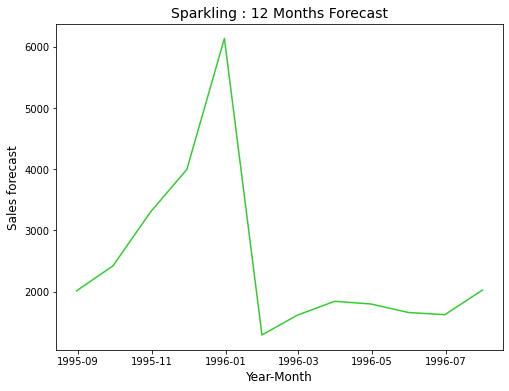

In [120]:
plt.figure(figsize=(8,6))
plt.plot(Forecast_auto_SARIMA_date['mean'], label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('Sparkling : 12 Months Forecast', fontsize=14);

Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [121]:
Forecast_auto_SARIMA_date['mean']

1995-08-31    2014.462525
1995-09-30    2421.766867
1995-10-31    3300.927328
1995-11-30    3997.243829
1995-12-31    6136.266264
1996-01-31    1292.782439
1996-02-29    1614.223042
1996-03-31    1843.034348
1996-04-30    1798.793485
1996-05-31    1659.573748
1996-06-30    1624.313883
1996-07-31    2025.739982
Freq: M, Name: mean, dtype: float64

In [122]:
Forecast_auto_SARIMA_date['mean'].describe()

count      12.000000
mean     2477.427312
std      1388.417781
min      1292.782439
25%      1650.758782
50%      1928.748436
75%      2641.556982
max      6136.266264
Name: mean, dtype: float64